In [1]:
import imageio
import matplotlib.pyplot as plt
import skimage.color as color
import cv2
import numpy as np
import scipy

In [2]:
video = imageio.mimread('1472 semen-00.avi')
print(video[0].shape)

(580, 780, 3)


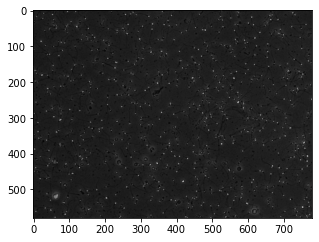

In [3]:
# Convertir imagen a grises

# opcion 1
image_bw1 = color.rgb2gray(video[0])*255

#opcion 2
image_bw2 = cv2.cvtColor(video[0], cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(5,8))
plt.imshow(image_bw2,cmap='gray')
plt.imsave('img_grises.jpeg',image_bw2,cmap='gray')

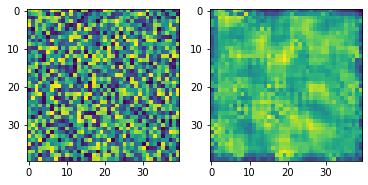

In [12]:
# Filtro de wiener

from scipy.signal.signaltools import wiener

img = np.random.random((40, 40))    #Create a random image
filtered_img = wiener(img, (5, 5))  #Filter the image
f, (plot1, plot2) = plt.subplots(1, 2)
plot1.imshow(img)
plot2.imshow(filtered_img)
plt.show()

In [4]:
# Filtro de wiener aplicado a la imagen de espermatozoides

from scipy.signal.signaltools import wiener

wfiltered_img = wiener(image_bw2, (3,3))  #Filter the image
plt.imsave('wfiltered_img.jpeg',wfiltered_img,cmap='gray')

In [18]:
# Probar filtrar con mediana

from scipy import ndimage, misc

median_filtered_img = ndimage.median_filter(image_bw2, size=3)
plt.imsave('median_filtered_img.jpeg',median_filtered_img,cmap='gray')

In [5]:
# Aplicar sobel

from scipy import ndimage

im = wfiltered_img.astype('int32')
dx = ndimage.sobel(im, 0)  # horizontal derivative
dy = ndimage.sobel(im, 1)  # vertical derivative
mag = np.hypot(dx, dy)  # magnitude
mag *= 255.0 / np.max(mag)  # normalize (Q&D)
sobel_img = mag
plt.imsave('sobel_img.jpeg',mag,cmap='gray')

In [43]:
# Paso 3: distinguir pixeles de borde - umbralizacion segun el paper de Urbano

s = np.mean(sobel_img**2)
k_c = 0.2
cutoff_threshold = k_c * s
binary_img = np.piecewise(sobel_img, [sobel_img < cutoff_threshold, sobel_img >= cutoff_threshold], [0, 1])
plt.imsave('binary_img.jpeg',binary_img,cmap='gray')

In [6]:
# Filtrar con Otsu

import cv2

grayimg = np.array(sobel_img, dtype=np.uint8)

# Otsu's thresholding
ret2,otsu = cv2.threshold(grayimg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(grayimg,(5,5),0)
ret3,filtered_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [8]:
%matplotlib qt
plt.subplot(131),plt.imshow(sobel_img,cmap='gray')
plt.subplot(132),plt.title('Otsu'),plt.imshow(otsu,cmap='gray')
plt.subplot(133),plt.title('Otsu filtrado'),plt.imshow(filtered_otsu,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa57c5395b0>,
 Text(0.5, 1.0, 'Otsu filtrado'),
 <matplotlib.image.AxesImage at 0x7fa57c4fef40>)

In [7]:
# Operaciones morfologicas

def morf_operations(img_in,kernel):

    dilation = cv2.dilate(img_in,kernel,iterations = 1)
    #closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
    erosion = cv2.erode(dilation,kernel,iterations = 1)
    return dilation, erosion

In [8]:
kernel = np.ones((3,3),np.uint8)

otsu = otsu[0:200,0:200]
filtered_otsu = filtered_otsu[0:200,0:200]

d1, e1 = morf_operations(otsu,kernel)
erosion = cv2.erode(filtered_otsu,kernel,iterations = 1)
dilatacion = cv2.dilate(erosion,kernel,iterations=1)

In [9]:
# Mostrar resultados de operaciones morfologicas

%matplotlib qt
plt.subplot(241),plt.title('Sobel'),plt.imshow(sobel_img[0:200,0:200],cmap='gray')
plt.subplot(245),plt.title('Sobel'),plt.imshow(sobel_img[0:200,0:200],cmap='gray')

plt.subplot(242),plt.title('Otsu'),plt.imshow(otsu,cmap='gray')
plt.subplot(246),plt.title('Otsu filtrado'),plt.imshow(filtered_otsu,cmap='gray')

plt.subplot(243),plt.title('dilatacion'),plt.imshow(d1,cmap='gray')
plt.subplot(247),plt.title('erosion'),plt.imshow(erosion,cmap='gray')

plt.subplot(244),plt.title('erosion'),plt.imshow(e1,cmap='gray')
plt.subplot(248),plt.title('dilatacion'),plt.imshow(dilatacion,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff8ac06cac0>,
 Text(0.5, 1.0, 'dilatacion'),
 <matplotlib.image.AxesImage at 0x7ff8a4900460>)

In [63]:
plt.imshow(otsu[-150:-1,-150:-1])

-1

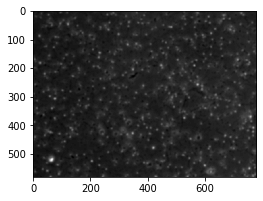

In [13]:
fig = plt.figure(figsize=(4,7))
gaussian1 = cv2.GaussianBlur(gray,(11,11),0)
gaussian2 = cv2.GaussianBlur(gaussian1,(11,11),0)
plt.imshow(gaussian2,cmap='gray')
cv2.imshow('a7',gaussian2)
cv2.waitKey(0)

In [16]:
laplacian = cv2.Laplacian(gaussian2,cv2.CV_64F)
cv2.imshow('a7',laplacian)
cv2.waitKey(0)

-1

In [41]:
# PRUEBAS LAPLACIANO

from scipy import ndimage, misc
result = ndimage.gaussian_laplace(gaussian2, sigma=0.9)

_, image_tresh = cv2.threshold(result,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#image_steched = cv2.morphologyEx(image_tresh, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
image_dilated = cv2.dilate(result, np.ones((3,3),np.uint8), iterations = 1)
image_steched = cv2.morphologyEx(image_dilated, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))


cv2.imshow('a1',image_tresh)
cv2.imshow('a2',result)
cv2.imshow('a3',image_steched)
cv2.imshow('a4',image_dilated)

cv2.waitKey(0)

-1

In [44]:
import numpy as np
import pandas as pd
from skimage.measure import label
import matplotlib.pyplot as plt


def detect_particles(seg_img):
    """
    Toma la imagen original y la segmentada como entrada, devuelve un dataframe con todas las partículas
    de la imagen y sus propidades.

    Parametros:
        seg_img (array(M,N)): imagen segmentada.

    Returns:
        particles (df(id, x, y, total_pixels, mask)): Dataframe con todas las partículas.
    """

    M = seg_img.shape[0]
    N = seg_img.shape[1]
    # Etiqueta cada partícula con un entero diferente
    labeled_img, total_particles = label(seg_img, connectivity=2, return_num=True)

    count = 0
    particles = pd.DataFrame(index=range(total_particles), columns=['id', 'x', 'y', 'total_pixels'])

    # Se recorren todos los pixeles de la imágen para hayar el centro geométrico de cada partícula haciendo
    # el promedio de sus coordenadas además se guardan el resto de las propiedades de las partículas
    for p in range(1, total_particles+1):
        particles.loc[p - 1, ['id']] = p
        coords_p = np.argwhere(labeled_img == p)
        particles.loc[p-1, ['x']] = np.mean(coords_p[:, 0])
        particles.loc[p-1, ['y']] = np.mean(coords_p[:, 1])
        particles.loc[p-1, ['total_pixels']] = coords_p.shape[0]

    return particles

In [45]:
particles = detect_particles(image_dilated)

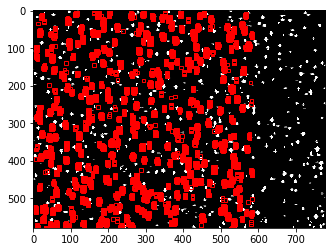

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = image_dilated

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im,cmap='gray')

# Create a Rectangle patch
for it, row in particles.iterrows():
    rect = patches.Rectangle((particles.loc[it, "x"], particles.loc[it, "y"]),10,10,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)


[[ 0  0 12 ... 16  0  0]
 [16 14 20 ... 32 16 16]
 [16 10 12 ... 48 32 32]
 ...
 [12  8 30 ... 32 12  4]
 [12 14 48 ... 16 16 28]
 [ 0 24 56 ...  0 40 48]]


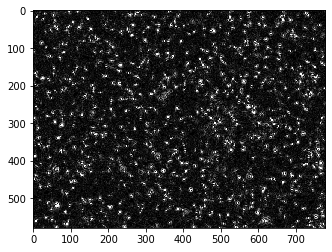

In [142]:
laplacian = cv2.Laplacian(gaussian1,cv2.CV_16S,ksize=5)
abs_dst = cv2.convertScaleAbs(laplacian)
print(abs_dst)
plt.imshow(abs_dst,cmap='gray')
#lap = np.uint8((laplacian - np.min(laplacian))/(np.max(laplacian)- np.min(laplacian))*255)
#plt.imshow(lap,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x2b33c58f400>,
 <matplotlib.image.AxesImage at 0x2b33c5cecc0>)

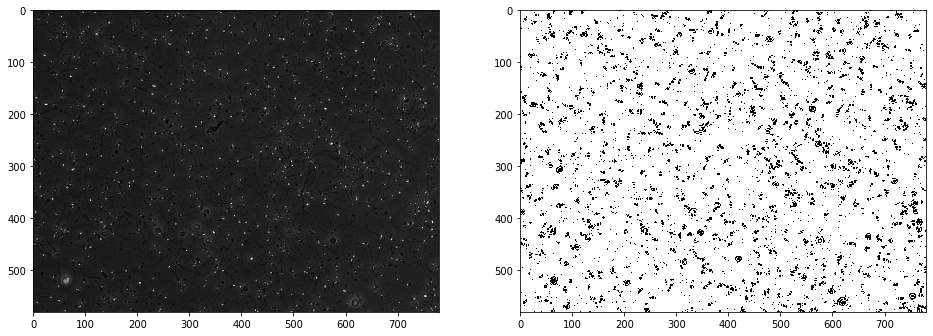

In [145]:
_, image_tresh = cv2.threshold(abs_dst,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
fig = plt.figure(figsize=(16,7))

plt.subplot(122),plt.imshow(lap>image_tresh,cmap='gray')
plt.subplot(121),plt.imshow(gray,cmap='gray')

(11, 11)


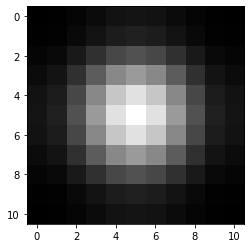

In [103]:
prueba = np.zeros((11,11))
prueba[5,5] = 1
k = (cv2.GaussianBlur(prueba,(11,11),0))
k_gray = color.rgb2gray(k)*255
print(k_gray.shape)
plt.imshow(k_gray,cmap='gray')
plt.imsave('resp_impulso.jpeg',k_gray)

In [ ]:
filtered_data = scipy.ndimage.filters.gaussian_filter(gray, sigma=s, truncate=t)

In [18]:
kernel = cv2.getGaussianKernel(11,11)
window = np.outer(kernel, kernel.transpose())

In [1]:
kernel = cv2.getGaussianKernel(11, 1)
window = np.outer(kernel, kernel.transpose())
mu1 = cv2.filter2D(gray, -1, window)[11:-11, 11:-11]  # valid
#fig = plt.figure(figsize=(20,15))
#plt.imshow(mu1,cmap='gray')

NameError: name 'cv2' is not defined